In [16]:
def plot_matrix(M):
  for i, row in enumerate(M):
    s = ''
    for j, col in enumerate(row):
      s = s +'('+str(j)+','+str(i)+') ['+str(M[i, j])+'] '
    print(s)
    print('\n')

# Simulations
In this notebook, I simulate simple "high-dimensional" datasets to show that the sensitivities as computed using the IFT are as expected. The datasets are therefore that simple that the stability of their TSNE embeddigs can be guessed beforehand.

In [ ]:
from tsne_jax import *
from jax import random
import numpy as onp
from utils import *
from tueplots.constants.color import palettes
#import tikzplotlib
colors = [palettes.tue_plot[1], palettes.tue_plot[2], palettes.tue_plot[6]]

### Highly unstable embedding
Multiple datapoints that are equidistant in high-dimensional space. 

Expectation: Small perturbations in the input(s) (only 5th coordinate) lead to big changes in the embedding since these perturbations change closest neighbors.

In [18]:
N = 0.1*np.identity(3)
D = 0.1*np.identity(5)

In [19]:
X = onp.array([[0, 0, 0, 0, -1], [0, 0, 0, 0, 0], [0, 0, 0, 0, 1]]).astype(float)

In [20]:
# tsne fwd
key = random.PRNGKey(41)
y_guess = random.normal(key, shape=(X.shape[0], 2))
Y_star = tsne_fwd(X, y_guess)
X_flat, X_unflattener = flatten_util.ravel_pytree(X)   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)

Perplexity value 30 is too high. Using perplexity 0.67 instead


===> Finding 2 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=0.25 for 250 iterations...
Iteration   50, KL divergence 0.4059, 50 iterations in 0.2766 sec
Iteration  100, KL divergence 0.4055, 50 iterations in 0.2442 sec
Iteration  150, KL divergence 0.4055, 50 iterations in 0.2471 sec
Iteration  200, KL divergence 0.4055, 50 iterations in 0.2455 sec
Iteration  250, KL divergence 0.4055, 50 iterations in 0.2456 sec
   --> Time elapsed: 1.26 seconds
===> Running optimization with exaggeration=1.00, lr=3.00 for 750 iterations...
Iteration   50, KL divergence 0.1296, 50 iterations in 0.2432 sec
Iteration  100, KL divergence 0.1283, 50 iterations in 0.2449 sec
Iteration  150, KL divergence 0.1289, 50 iterations in 0.2438 sec
Iteration  200, KL divergence 0.1289, 50 iterations in 0.2449 sec
Iteration  250,

Text(0, 0.5, 'TSNE 2')

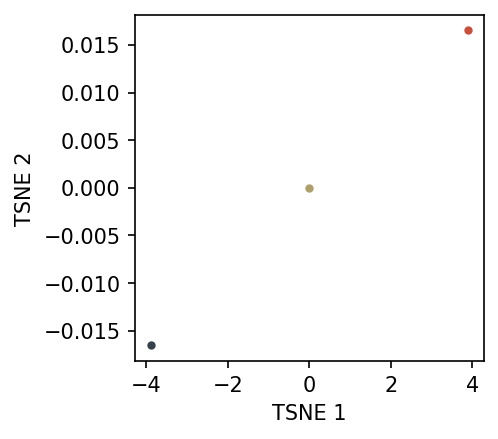

In [21]:
fig = plt.figure(figsize=(3, 3))
for i, s in enumerate(Y_star):
    plt.plot(s[0], s[1], c=colors[i], marker='.')
#plt.scatter(*Y_star.T, c=colors)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
#tikzplotlib.save("figures_diss/tsnePlotHighlyUncertain.pgf")

In [22]:
dy_dx = compute_sensitivities(X_flat, Y_flat, X_unflattener, Y_unflattener, 0.67)


<Axes: >

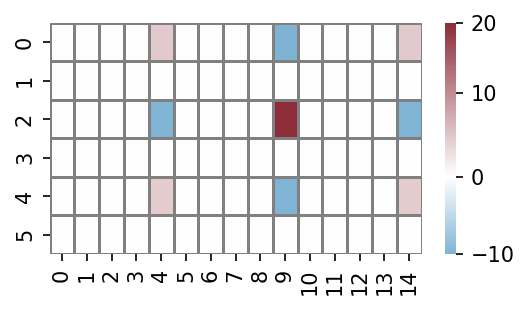

In [23]:
plot_heatmap(dy_dx, figsize=(4, 2))

The Jacobian is as expected. All zero except for derivatives with respect to the 5th input coordinate of each sample. When perturbing the middle point ($x_5 + e$), in the embedding the point would come closer to the right point (in the Jacobian, (2, 9) and (3, 9) have a positive and negative slope, pointing towards the third point)...

In [24]:
plot_matrix(dy_dx)

(0,0) [0.0] (1,0) [0.0] (2,0) [0.0] (3,0) [0.0] (4,0) [4.5776935] (5,0) [0.0] (6,0) [0.0] (7,0) [0.0] (8,0) [0.0] (9,0) [-9.155387] (10,0) [0.0] (11,0) [0.0] (12,0) [0.0] (13,0) [0.0] (14,0) [4.5776935] 


(0,1) [0.0] (1,1) [0.0] (2,1) [0.0] (3,1) [0.0] (4,1) [0.019628111] (5,1) [0.0] (6,1) [0.0] (7,1) [0.0] (8,1) [0.0] (9,1) [-0.039256223] (10,1) [0.0] (11,1) [0.0] (12,1) [0.0] (13,1) [0.0] (14,1) [0.019628111] 


(0,2) [0.0] (1,2) [0.0] (2,2) [0.0] (3,2) [0.0] (4,2) [-9.15053] (5,2) [0.0] (6,2) [0.0] (7,2) [0.0] (8,2) [0.0] (9,2) [18.30106] (10,2) [0.0] (11,2) [0.0] (12,2) [0.0] (13,2) [0.0] (14,2) [-9.15053] 


(0,3) [0.0] (1,3) [0.0] (2,3) [0.0] (3,3) [0.0] (4,3) [-0.038781773] (5,3) [0.0] (6,3) [0.0] (7,3) [0.0] (8,3) [0.0] (9,3) [0.07756355] (10,3) [0.0] (11,3) [0.0] (12,3) [0.0] (13,3) [0.0] (14,3) [-0.038781773] 


(0,4) [0.0] (1,4) [0.0] (2,4) [0.0] (3,4) [0.0] (4,4) [4.5729628] (5,4) [0.0] (6,4) [0.0] (7,4) [0.0] (8,4) [0.0] (9,4) [-9.1459255] (10,4) [0.0] (11,4) [0.0] (12,4)

<Axes: >

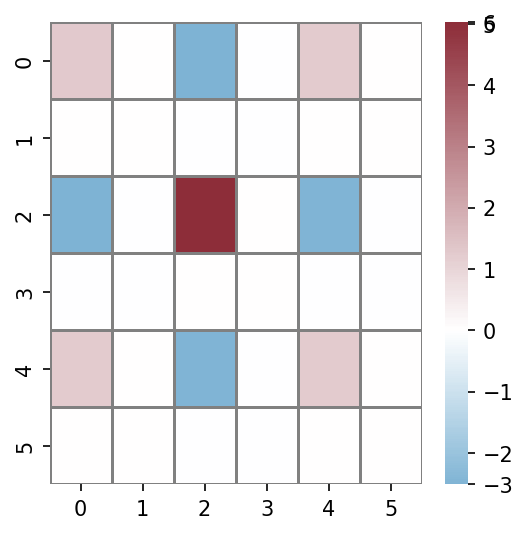

In [25]:
cov_final = compute_cov(X_flat, Y_flat, X_unflattener, Y_unflattener, D, N, 0.67)
cov_final = cov_final + 1e-3*np.eye(len(cov_final))
plot_heatmap(cov_final, figsize=(4, 4))

(6, 20)


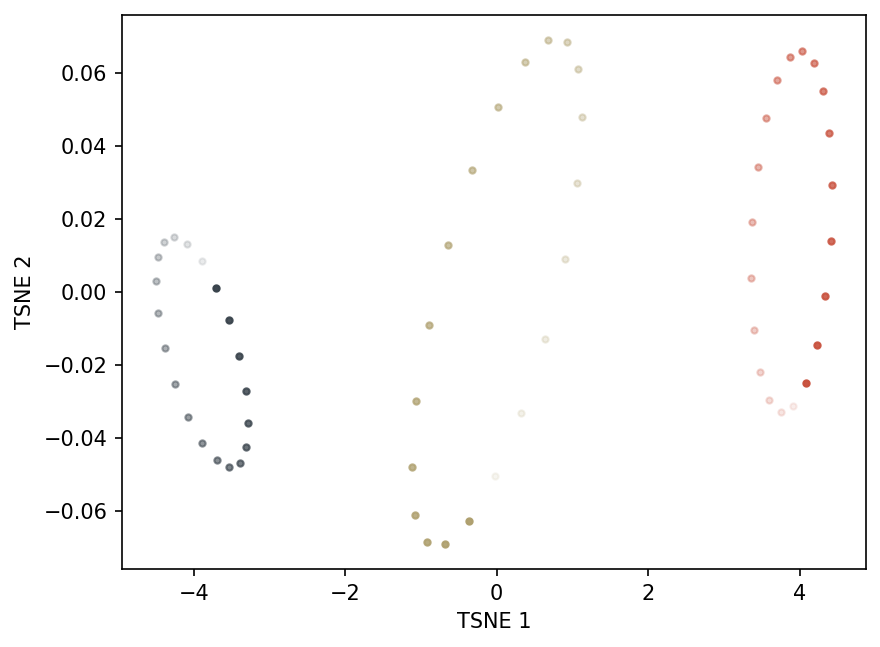

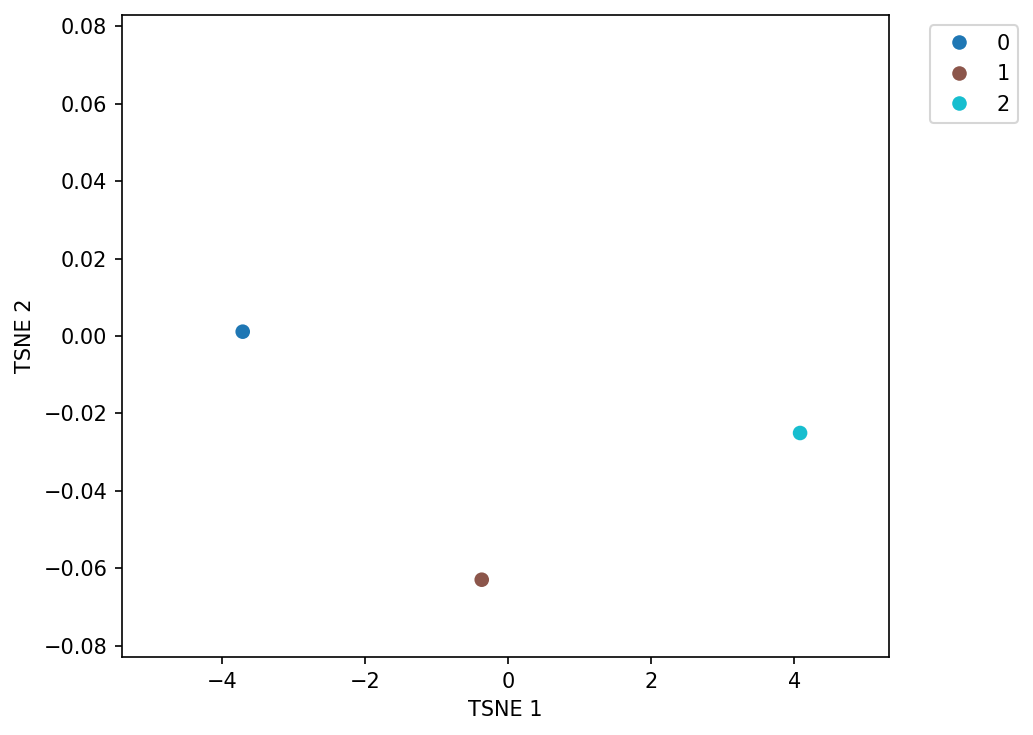

In [ ]:
from utils import equipotential_standard_normal

n_samples = 20
y_int = [i for i in range(Y_star.shape[0])]
S = equipotential_standard_normal(2 * Y_star.shape[0], n_samples)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)
print(samples.shape)

fig = plt.figure(1)
for j, sample in enumerate(samples.T):
    sample = Y_unflattener(sample)
    for i, s in enumerate(sample): 
        plt.plot(s[0], s[1], c=colors[i], alpha=[i for i in np.arange(0.1, 1, 1/(n_samples+2))][j], marker='.')
               #marker=list(Line2D.markers.keys())[j])
#plt.axis('equal')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
#tikzplotlib.save("figures_diss/tsneUncertaintyPlotHighlyUncertain.pgf")
#from animate_ifd import animate
#animate(samples, [i for i in range(Y_star.shape[0])], 'simulation/unstable.gif', cmap='tab10')

### Highly unstable embedding
Multiple datapoints that are equidistant in high-dimensional space. The distance between the points is larger as in the example before

Expectation: Small perturbations in the input(s) (only 5th coordinate) lead to big changes in the embedding since these perturbations change closest neighbors. The derivatives should be smaller than in the example before, since the distance between the points are bigger, so small perturbations do not affect the embedding that much.

In [12]:
X = onp.array([[0, 0, 0, 0, -5], [0, 0, 0, 0, 0], [0, 0, 0, 0, 5]]).astype(float)

In [13]:
# tsne fwd
key = random.PRNGKey(41)
y_guess = random.normal(key, shape=(X.shape[0], 2))
Y_star = tsne_fwd(X, y_guess)
X_flat, X_unflattener = flatten_util.ravel_pytree(X)   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)

Perplexity value 30 is too high. Using perplexity 0.67 instead


===> Finding 2 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 2.0332, 50 iterations in 0.8482 sec
Iteration  100, KL divergence 5.9790, 50 iterations in 0.6658 sec
Iteration  150, KL divergence 1.2220, 50 iterations in 0.6748 sec
Iteration  200, KL divergence 0.7694, 50 iterations in 0.6487 sec
Iteration  250, KL divergence 2.1999, 50 iterations in 0.6521 sec
   --> Time elapsed: 3.49 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.1646, 50 iterations in 0.6480 sec
Iteration  100, KL divergence 0.1355, 50 iterations in 0.6394 sec
Iteration  150, KL divergence 0.1277, 50 iterations in 0.6341 sec
Iteration  200, KL divergence 0.1327, 50 iterations in 0.6547 sec
Iteration  

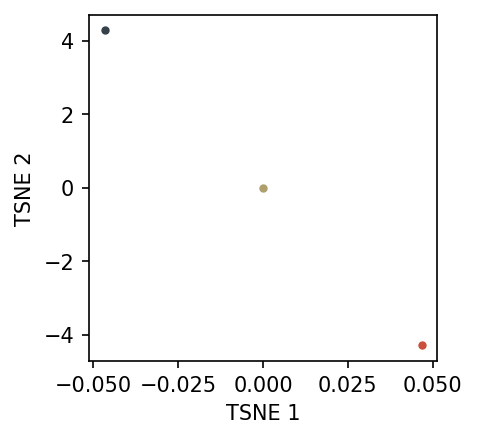

In [14]:
fig = plt.figure(figsize=(3, 3))
for i, s in enumerate(Y_star):
    plt.plot(s[0], s[1], c=colors[i], marker='.')
#plt.scatter(*Y_star.T, c=colors)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
tikzplotlib.save("figures_diss/tsnePlotLessUncertain.pgf")

In [15]:
dy_dx = compute_sensitivities(X_flat, Y_flat, X_unflattener, Y_unflattener, 0.67)

<Axes: >

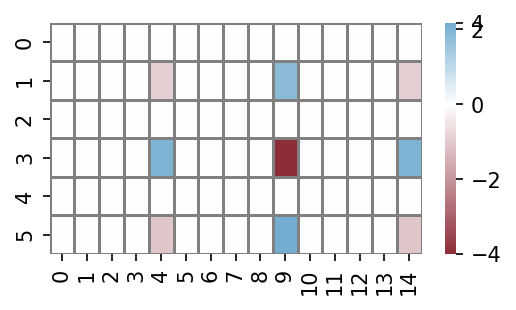

In [16]:
plot_heatmap(dy_dx, figsize=(4, 2))

In [17]:
plot_matrix(dy_dx)

(0,0) [0.0] (1,0) [0.0] (2,0) [0.0] (3,0) [0.0] (4,0) [0.009875236] (5,0) [0.0] (6,0) [0.0] (7,0) [0.0] (8,0) [0.0] (9,0) [-0.019750472] (10,0) [0.0] (11,0) [0.0] (12,0) [0.0] (13,0) [0.0] (14,0) [0.009875236] 


(0,1) [0.0] (1,1) [0.0] (2,1) [0.0] (3,1) [0.0] (4,1) [-0.90566367] (5,1) [0.0] (6,1) [0.0] (7,1) [0.0] (8,1) [0.0] (9,1) [1.8113273] (10,1) [0.0] (11,1) [0.0] (12,1) [0.0] (13,1) [0.0] (14,1) [-0.90566367] 


(0,2) [0.0] (1,2) [0.0] (2,2) [0.0] (3,2) [0.0] (4,2) [-0.021696256] (5,2) [0.0] (6,2) [0.0] (7,2) [0.0] (8,2) [0.0] (9,2) [0.043392513] (10,2) [0.0] (11,2) [0.0] (12,2) [0.0] (13,2) [0.0] (14,2) [-0.021696256] 


(0,3) [0.0] (1,3) [0.0] (2,3) [0.0] (3,3) [0.0] (4,3) [1.9926789] (5,3) [0.0] (6,3) [0.0] (7,3) [0.0] (8,3) [0.0] (9,3) [-3.9853578] (10,3) [0.0] (11,3) [0.0] (12,3) [0.0] (13,3) [0.0] (14,3) [1.9926789] 


(0,4) [0.0] (1,4) [0.0] (2,4) [0.0] (3,4) [0.0] (4,4) [0.011818361] (5,4) [0.0] (6,4) [0.0] (7,4) [0.0] (8,4) [0.0] (9,4) [-0.023636721] (10,4) [0.0] (11,4)

<Axes: >

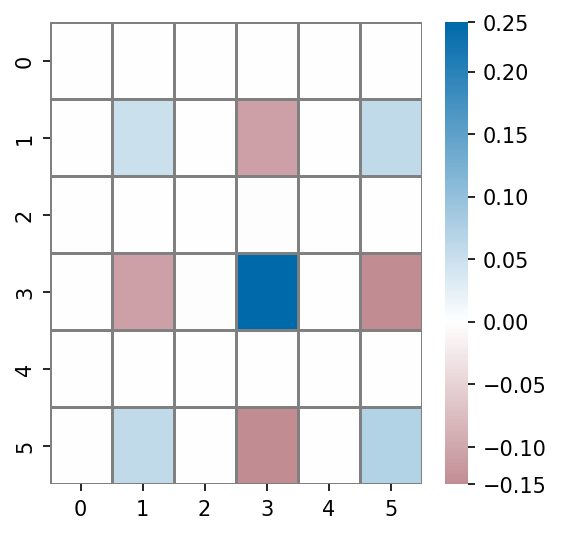

In [18]:
cov_final = compute_cov(X_flat, Y_flat, X_unflattener, Y_unflattener, D, N, 0.67)
cov_final = cov_final + 1e-3*np.eye(len(cov_final))
plot_heatmap(cov_final, figsize=(4, 4))

(6, 20)


Text(0, 0.5, 'TSNE 2')

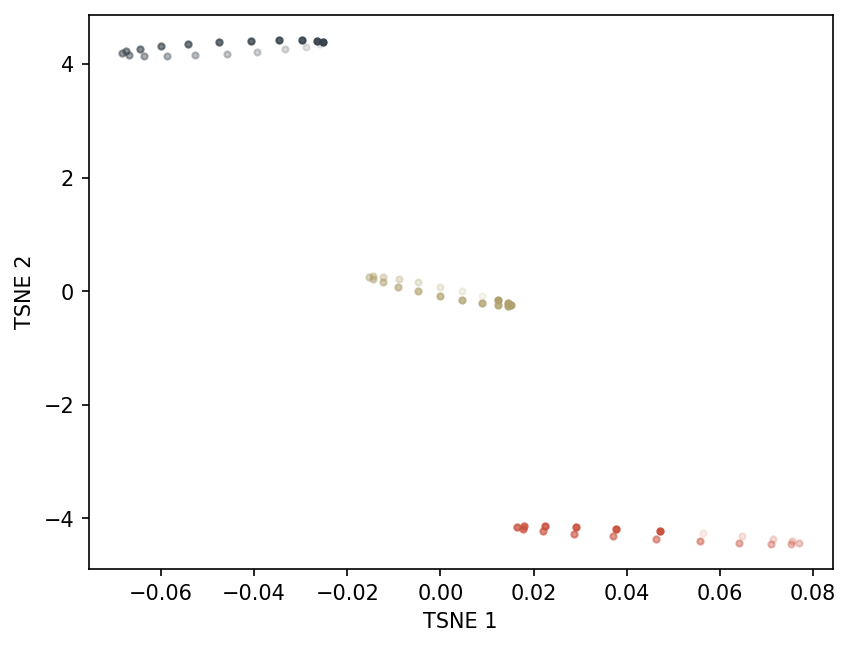

In [19]:
from utils import equipotential_standard_normal_within_one_std

n_samples = 20
y_int = [i for i in range(Y_star.shape[0])]
S = equipotential_standard_normal_within_one_std(2 * Y_star.shape[0], n_samples)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)
print(samples.shape)

fig = plt.figure(1)
for j, sample in enumerate(samples.T):
    sample = Y_unflattener(sample)
    for i, s in enumerate(sample): 
        plt.plot(s[0], s[1], c=colors[i], alpha=[i for i in np.arange(0.1, 1, 1/(n_samples+2))][j], marker='.')
               #marker=list(Line2D.markers.keys())[j])
#plt.axis('equal')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
#tikzplotlib.save("figures_diss/tsneUncertaintyPlotLessUncertain.pgf")
#from animate_ifd import *
#animate(samples, [i for i in range(Y_star.shape[0])], 'simulation/unstable.gif', cmap='tab10')

### Highly stable embedding
Multiple datapoints that are NOT equidistant in high-dimensional space. It is clear which samples are nieghbors.

Expectation: Small perturbations in the input(s) (only 5th coordinate) lead to small changes in the embedding since these perturbations do not change closest neighbors. The derivatives should be in a way that point 2 and 3 should be dragged to each other.

In [20]:
X = onp.array([[0, 0, 0, 0, -1], [0, 0, 0, 0, 0.3], [0, 0, 0, 0, 1]]).astype(float)

In [21]:
# tsne fwd
key = random.PRNGKey(41)
y_guess = random.normal(key, shape=(X.shape[0], 2))
Y_star = tsne_fwd(X, y_guess)
X_flat, X_unflattener = flatten_util.ravel_pytree(X)   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)

Perplexity value 30 is too high. Using perplexity 0.67 instead


===> Finding 2 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 0.7961, 50 iterations in 0.7141 sec
Iteration  100, KL divergence 1.6271, 50 iterations in 0.5481 sec
Iteration  150, KL divergence 1.2665, 50 iterations in 0.5598 sec
Iteration  200, KL divergence 1.1591, 50 iterations in 0.5760 sec
Iteration  250, KL divergence 0.7793, 50 iterations in 0.5664 sec
   --> Time elapsed: 2.96 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.1188, 50 iterations in 0.5912 sec
Iteration  100, KL divergence 0.1163, 50 iterations in 0.5821 sec
Iteration  150, KL divergence 0.1148, 50 iterations in 0.5640 sec
Iteration  200, KL divergence 0.1178, 50 iterations in 0.5824 sec
Iteration  

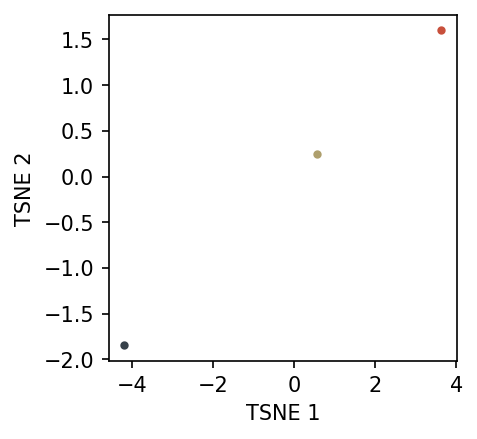

In [22]:
fig = plt.figure(figsize=(3, 3))
for i, s in enumerate(Y_star):
    plt.plot(s[0], s[1], c=colors[i], marker='.')
#plt.scatter(*Y_star.T, c=colors)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
tikzplotlib.save("figures_diss/tsnePlotStable.pgf")

In [23]:
dy_dx = compute_sensitivities(X_flat, Y_flat, X_unflattener, Y_unflattener, 0.67)

In [24]:
print(np.min(dy_dx), np.max(dy_dx))

-8.5883855e-08 9.83474e-08


<Axes: >

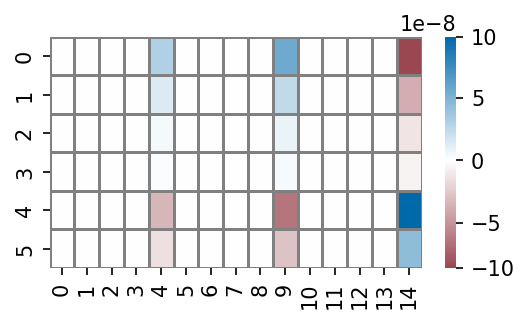

In [25]:
plot_heatmap(dy_dx, figsize=(4, 2))

In [26]:
plot_matrix(dy_dx)

(0,0) [0.0] (1,0) [0.0] (2,0) [0.0] (3,0) [0.0] (4,0) [3.0059354e-08] (5,0) [0.0] (6,0) [0.0] (7,0) [0.0] (8,0) [0.0] (9,0) [5.5824508e-08] (10,0) [0.0] (11,0) [0.0] (12,0) [0.0] (13,0) [0.0] (14,0) [-8.5883855e-08] 


(0,1) [0.0] (1,1) [0.0] (2,1) [0.0] (3,1) [0.0] (4,1) [1.3222459e-08] (5,1) [0.0] (6,1) [0.0] (7,1) [0.0] (8,1) [0.0] (9,1) [2.455599e-08] (10,1) [0.0] (11,1) [0.0] (12,1) [0.0] (13,1) [0.0] (14,1) [-3.777845e-08] 


(0,2) [0.0] (1,2) [0.0] (2,2) [0.0] (3,2) [0.0] (4,2) [4.3616564e-09] (5,2) [0.0] (6,2) [0.0] (7,2) [0.0] (8,2) [0.0] (9,2) [8.100262e-09] (10,2) [0.0] (11,2) [0.0] (12,2) [0.0] (13,2) [0.0] (14,2) [-1.2461918e-08] 


(0,3) [0.0] (1,3) [0.0] (2,3) [0.0] (3,3) [0.0] (4,3) [1.9187667e-09] (5,3) [0.0] (6,3) [0.0] (7,3) [0.0] (8,3) [0.0] (9,3) [3.5634427e-09] (10,3) [0.0] (11,3) [0.0] (12,3) [0.0] (13,3) [0.0] (14,3) [-5.4822094e-09] 


(0,4) [0.0] (1,4) [0.0] (2,4) [0.0] (3,4) [0.0] (4,4) [-3.442158e-08] (5,4) [0.0] (6,4) [0.0] (7,4) [0.0] (8,4) [0.0] (9,4) [-6

<Axes: >

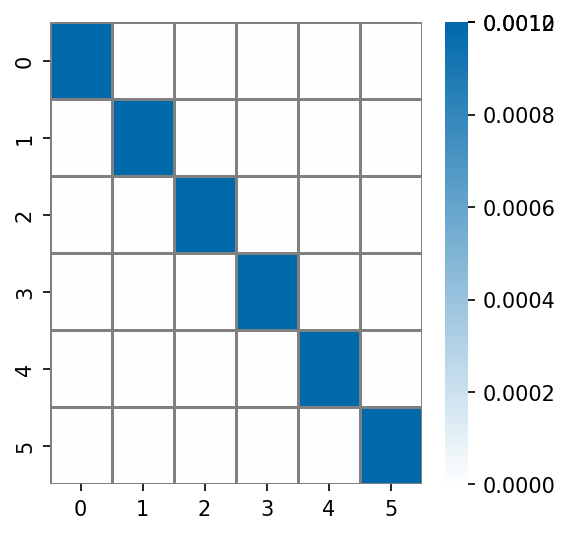

In [27]:
cov_final = compute_cov(X_flat, Y_flat, X_unflattener, Y_unflattener, D, N, 0.67)
cov_final = cov_final + 1e-3*np.eye(len(cov_final))
plot_heatmap(cov_final, figsize=(4, 4))

(6, 20)


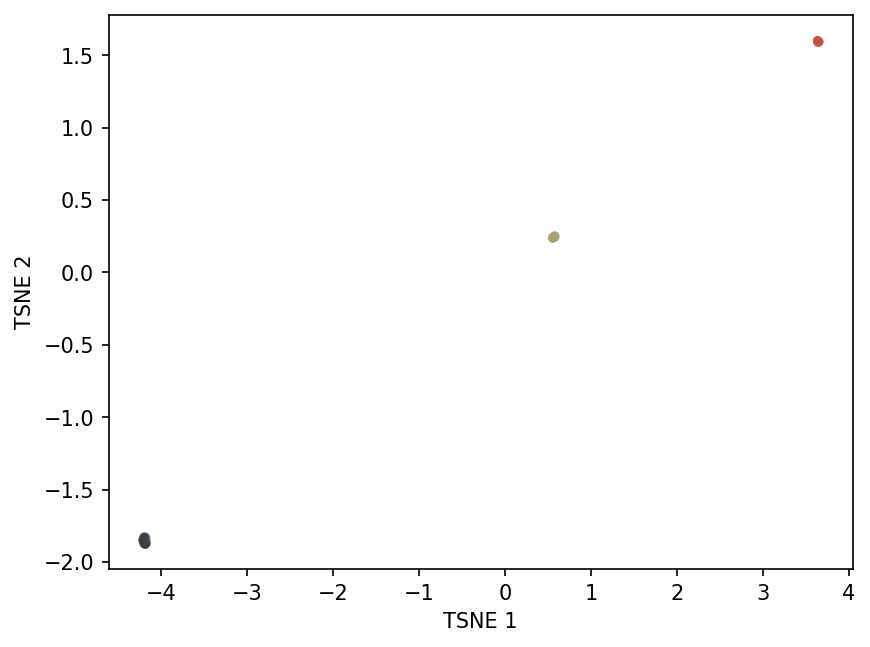

In [28]:
from utils import equipotential_standard_normal_within_one_std

n_samples = 20
y_int = [i for i in range(Y_star.shape[0])]
S = equipotential_standard_normal_within_one_std(2 * Y_star.shape[0], n_samples)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)
print(samples.shape)

fig = plt.figure(1)
for j, sample in enumerate(samples.T):
    sample = Y_unflattener(sample)
    for i, s in enumerate(sample): 
        plt.plot(s[0], s[1], c=colors[i], alpha=[i for i in np.arange(0.1, 1, 1/(n_samples+2))][j], marker='.')
               #marker=list(Line2D.markers.keys())[j])
#plt.axis('equal')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
tikzplotlib.save("figures_diss/tsneUncertaintyPlotStable.pgf")
#from animate_ifd import *
#animate(samples, [i for i in range(Y_star.shape[0])], 'simulation/unstable.gif', cmap='tab10')

### new example

In [29]:
X = onp.array([[0, 0, 0, 0.3, -1], [0, 0, 0, 1, 0.3], [0, 0, 0, -1, 1]]).astype(float)

In [30]:
# tsne fwd
key = random.PRNGKey(41)
y_guess = random.normal(key, shape=(X.shape[0], 2))
Y_star = tsne_fwd(X, y_guess)
X_flat, X_unflattener = flatten_util.ravel_pytree(X)   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)

Perplexity value 30 is too high. Using perplexity 0.67 instead


===> Finding 2 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 1.0660, 50 iterations in 0.7165 sec
Iteration  100, KL divergence 1.2934, 50 iterations in 0.6459 sec
Iteration  150, KL divergence 0.9381, 50 iterations in 0.5744 sec
Iteration  200, KL divergence 0.9172, 50 iterations in 0.6251 sec
Iteration  250, KL divergence 0.5866, 50 iterations in 0.5780 sec
   --> Time elapsed: 3.14 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.1156, 50 iterations in 0.5742 sec
Iteration  100, KL divergence 0.1156, 50 iterations in 0.5473 sec
Iteration  150, KL divergence 0.1168, 50 iterations in 0.5476 sec
Iteration  200, KL divergence 0.1147, 50 iterations in 0.5466 sec
Iteration  

Text(0, 0.5, 'TSNE 2')

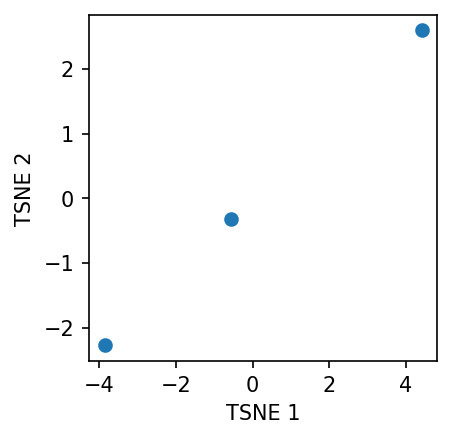

In [31]:
fig = plt.figure(figsize=(3, 3))
plt.scatter(*Y_star.T)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

In [32]:
dy_dx = compute_sensitivities(X_flat, Y_flat, X_unflattener, Y_unflattener, 0.67)
#print(dy_dx)

<Axes: >

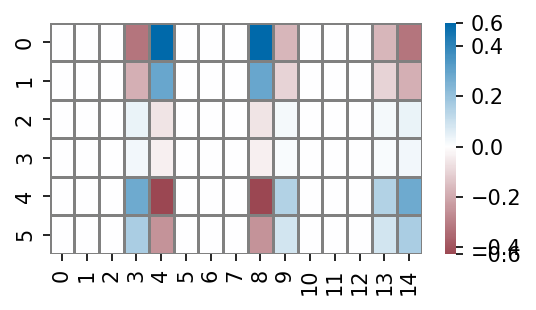

In [33]:
plot_heatmap(dy_dx, figsize=(4, 2))

Only unstable

<Axes: >

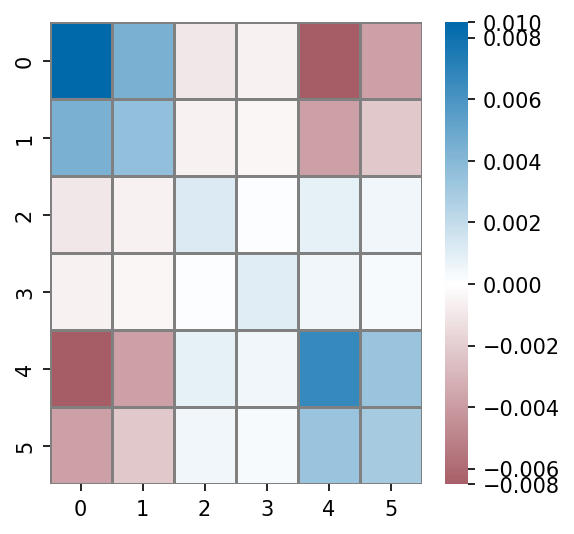

In [34]:
cov_final = compute_cov(X_flat, Y_flat, X_unflattener, Y_unflattener, D, N, 0.67)
cov_final = cov_final + 1e-3*np.eye(len(cov_final))
plot_heatmap(cov_final, figsize=(4, 4))

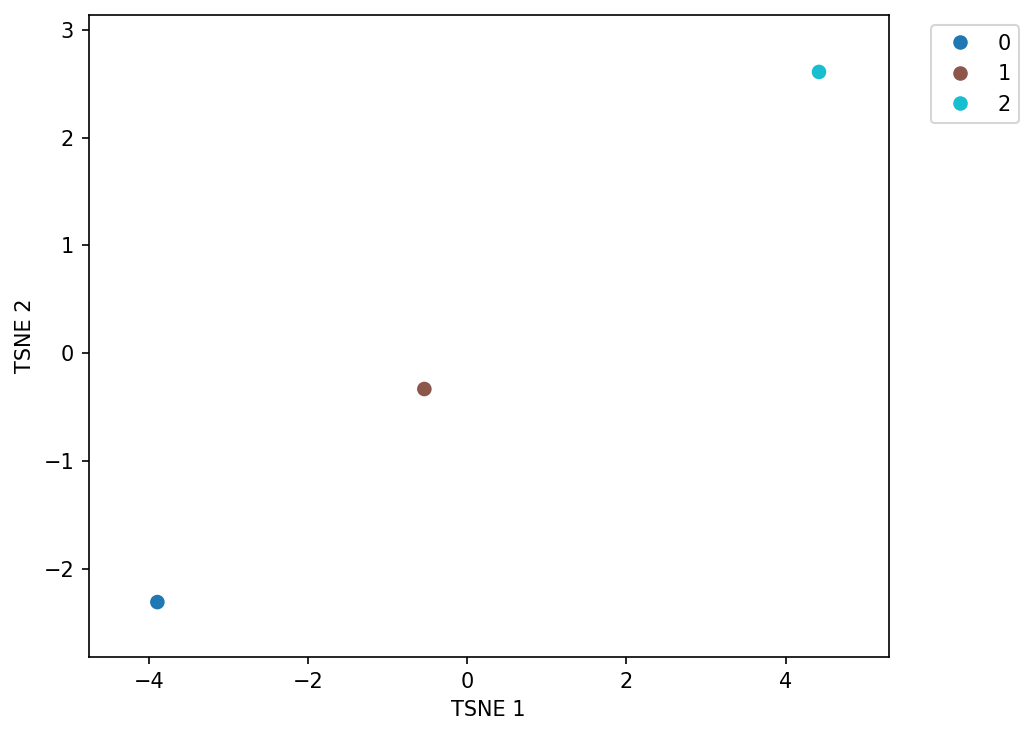

In [35]:
from utils import equipotential_standard_normal_within_one_std

S = equipotential_standard_normal_within_one_std(2 * Y_star.shape[0], 20)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)

from animate_ifd import *
animate(samples, [i for i in range(Y_star.shape[0])], 'simulation/new_example.gif', cmap='tab10')

# Comparison not simplified to simplified (without/with stop.gradient) to auto-differentiate tsne

In [36]:
from pseudo_IFD_tsne import KL_divergence

fun = lambda y: KL_divergence(X_flat, y, X_unflattener, Y_unflattener, perplexity)
H = jax.hessian(fun)(Y_flat)
#print(H)
H_pinv = np.linalg.pinv(H, hermitian=True)

J_X_Y = jacfwd(jacfwd(KL_divergence, argnums=1), argnums=0)(X_flat, Y_flat, X_unflattener, Y_unflattener, perplexity)
#print(J_X_Y)

dy_dx = np.dot(-H_pinv, J_X_Y)
print(dy_dx)

NameError: name 'perplexity' is not defined

In [ ]:
from tsne_jax import KL_divergence_dy
f = partial(KL_divergence_dy, X_unflattener=X_unflattener, Y_unflattener=Y_unflattener, perplexity=0.67)
H = jax.jacrev(f, argnums=1)(X_flat, Y_flat)
#print(H)
H_pinv = np.linalg.pinv(H, hermitian=True)
J_X_Y = jax.jacrev(f, argnums=0)(X_flat, Y_flat)
#print(J_X_Y)
dy_dx = np.dot(-H_pinv, J_X_Y)
print(dy_dx)

[[  0.           0.           0.           0.           1.0377043
    0.           0.           0.           0.          19.71639
    0.           0.           0.           0.         -20.75409   ]
 [  0.           0.           0.           0.          -1.5555934
    0.           0.           0.           0.         -29.55627
    0.           0.           0.           0.          31.111876  ]
 [  0.           0.           0.           0.          -0.08391406
    0.           0.           0.           0.          -1.5943674
    0.           0.           0.           0.           1.6782839 ]
 [  0.           0.           0.           0.           0.12583245
    0.           0.           0.           0.           2.3908107
    0.           0.           0.           0.          -2.5166454 ]
 [  0.           0.           0.           0.          -0.9536468
    0.           0.           0.           0.         -18.119286
    0.           0.           0.           0.          19.072945  ]
 [ 

In [ ]:
dy_dx = compute_sensitivities(X_flat, Y_flat, X_unflattener, Y_unflattener, 0.67)
print(dy_dx)

[[  0.           0.           0.           0.           1.0377035
    0.           0.           0.           0.          19.716358
    0.           0.           0.           0.         -20.75406   ]
 [  0.           0.           0.           0.          -1.5555944
    0.           0.           0.           0.         -29.556278
    0.           0.           0.           0.          31.111874  ]
 [  0.           0.           0.           0.          -0.08391392
    0.           0.           0.           0.          -1.5943646
    0.           0.           0.           0.           1.6782786 ]
 [  0.           0.           0.           0.           0.12583232
    0.           0.           0.           0.           2.390813
    0.           0.           0.           0.          -2.5166454 ]
 [  0.           0.           0.           0.          -0.95364666
    0.           0.           0.           0.         -18.11929
    0.           0.           0.           0.          19.072935  ]
 [